In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tsdt import *
from utils import *
from skmultiflow.trees import HoeffdingTreeClassifier, ExtremelyFastDecisionTreeClassifier
from skmultiflow.data import LEDGenerator
from sklearn.model_selection import KFold
from statistics import median, quantiles
from matplotlib.lines import Line2D
from time import time
import pandas as pd
import seaborn as sns
import pickle as pkl
import os

from sklearn.preprocessing import OneHotEncoder

# MONK 1

In [2]:
data_train = np.genfromtxt('../data/monks-1.train', delimiter=' ', dtype=int)
#np.random.shuffle(data_train)
data_train = data_train[:, :-1] # Getting rid of the last column, it contains only ids.
data_train = data_train[:, ::-1]

data_test = np.genfromtxt('../data/monks-1.test', delimiter=' ', dtype=int)
data_test = data_test[:, :-1] # Getting rid of the last column, it contains only ids.
data_test = data_test[:, ::-1]

labels = set(data_train[:, -1])
K = len(labels)
print('n_train : %d' %data_train.shape[0])
print('n_test : %d' %data_test.shape[0])

n_train : 124
n_test : 432


## Drop Last

In [3]:
encoder = OneHotEncoder(drop=np.array([3, 3, 2, 3, 4, 2][::-1]+[0]), sparse=False)
encoder.fit(data_train)
data_train_encoded, data_test_encoded = encoder.transform(data_train).astype(int), encoder.transform(data_test).astype(int)
stream_generator_train = StreamGeneratorReal(data_train_encoded)
stream_generator_test = StreamGeneratorReal(data_test_encoded)

In [4]:
n_iter = 1000
n_samples = 100
thresh_tree = -1e-6
thresh_leaf = 1e-6
thresh_mu = 0.8
thresh_sigma = 0.1
print_iter = 100
time_limit = 300
gamma = 0.75
lambd = 0.01

In [5]:
start_time = time()
tsdt = TSDT(stream_generator_train.categories, K, 'gini')
node, searchtree = tsdt.run(stream_generator_train, n_iter, n_samples, thresh_tree, thresh_leaf, thresh_mu, thresh_sigma, 'n_visits', lambd, gamma, print_iter, time_limit)
print('execution time : %.4f' %(time() - start_time))

iteration : 0
iteration : 100
iteration : 200
iteration : 300
iteration : 400
iteration : 500
iteration : 600
iteration : 700
iteration : 800
iteration : 900
execution time : 17.7484


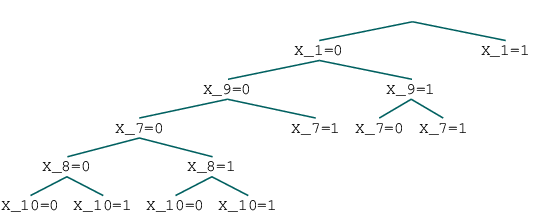

In [6]:
node.tree.plot_tree()

In [7]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 8
Number of Splits: 7


In [8]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 1.000
Test Accuracy : 1.000


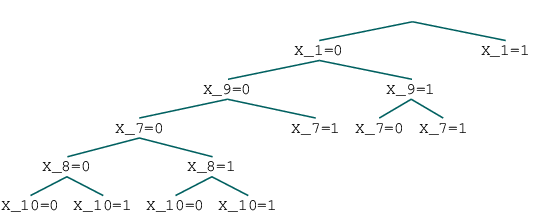

In [9]:
node = searchtree.infer('max_value')
node.tree.plot_tree()

In [10]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 1.000
Test Accuracy : 1.000


## Drop First

In [3]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(data_train)
data_train_encoded, data_test_encoded = encoder.transform(data_train).astype(int), encoder.transform(data_test).astype(int)
stream_generator_train = StreamGeneratorReal(data_train_encoded)
stream_generator_test = StreamGeneratorReal(data_test_encoded)

In [4]:
n_iter = 10000
n_samples = 100
thresh_tree = -1e-6
thresh_leaf = 1e-6
thresh_mu = 0.8
thresh_sigma = 0.1
print_iter = 100
time_limit = 300
lambd = 0.0025
gamma = 0.75

In [5]:
start_time = time()
tsdt = TSDT(stream_generator_train.categories, K, 'gini')
node, searchtree = tsdt.run(stream_generator_train, n_iter, n_samples, thresh_tree, thresh_leaf, thresh_mu, thresh_sigma, 'n_visits', lambd, gamma, print_iter, time_limit)
print('execution time : %.4f' %(time() - start_time))

iteration : 0
iteration : 100
iteration : 200
iteration : 300
iteration : 400
iteration : 500
iteration : 600
iteration : 700
iteration : 800
iteration : 900
iteration : 1000
iteration : 1100
iteration : 1200
iteration : 1300
iteration : 1400
iteration : 1500
iteration : 1600
iteration : 1700
iteration : 1800
iteration : 1900
iteration : 2000
iteration : 2100
iteration : 2200
iteration : 2300
iteration : 2400
iteration : 2500
iteration : 2600
iteration : 2700
iteration : 2800
iteration : 2900
iteration : 3000
iteration : 3100
iteration : 3200
iteration : 3300
iteration : 3400
iteration : 3500
iteration : 3600
iteration : 3700
iteration : 3800
iteration : 3900
iteration : 4000
iteration : 4100
iteration : 4200
iteration : 4300
iteration : 4400
iteration : 4500
iteration : 4600
iteration : 4700
iteration : 4800
iteration : 4900
iteration : 5000
iteration : 5100
iteration : 5200
iteration : 5300
iteration : 5400
iteration : 5500
iteration : 5600
iteration : 5700
iteration : 5800
iteration

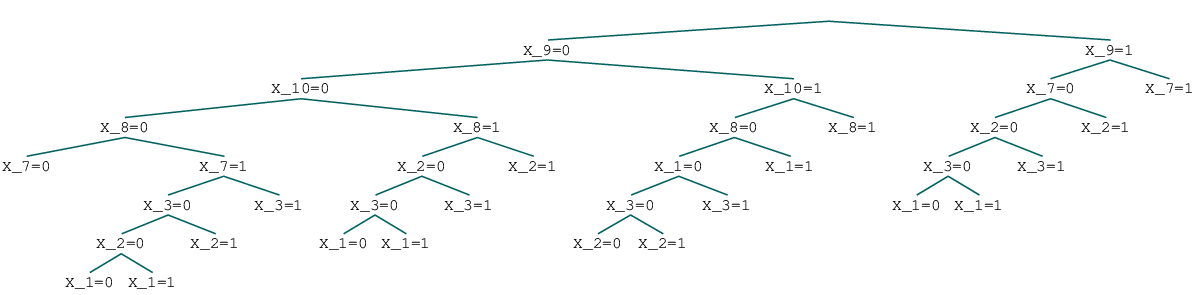

In [6]:
node.tree.plot_tree()

In [7]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 19
Number of Splits: 18


In [8]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 1.000
Test Accuracy : 1.000


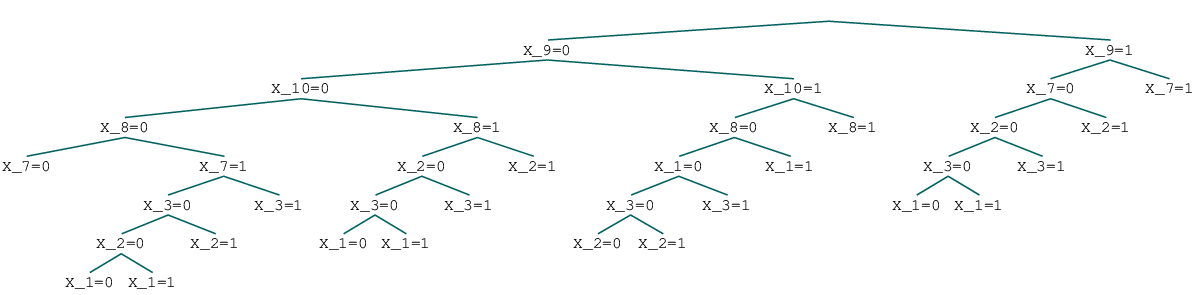

In [9]:
node = searchtree.infer('max_value')
node.tree.plot_tree()

In [10]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 19
Number of Splits: 18


In [11]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 1.000
Test Accuracy : 1.000


## Original

In [3]:
stream_generator_train = StreamGeneratorReal(data_train)
stream_generator_test = StreamGeneratorReal(data_test)

In [4]:
n_iter = 1000
n_samples = 100
thresh_tree = -1e-6
thresh_leaf = 1e-6
thresh_mu = 0.8
thresh_sigma = 0.1
print_iter = 100
time_limit = 300
gamma = 0.75
lambd = 0.01

In [5]:
start_time = time()
tsdt = TSDT(stream_generator_train.categories, K, 'gini')
node, searchtree = tsdt.run(stream_generator_train, n_iter, n_samples, thresh_tree, thresh_leaf, thresh_mu, thresh_sigma, 'n_visits', lambd, gamma, print_iter, time_limit)
print('execution time : %.4f' %(time() - start_time))

iteration : 0
iteration : 100
iteration : 200
iteration : 300
iteration : 400
iteration : 500
iteration : 600
iteration : 700
iteration : 800
iteration : 900
execution time : 19.0791


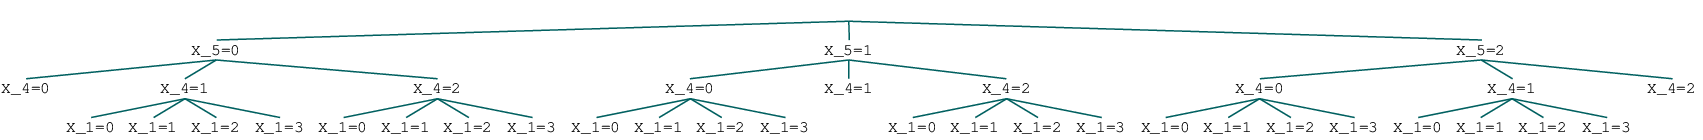

In [6]:
node.tree.plot_tree()

In [7]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 27
Number of Splits: 10


In [8]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 1.000
Test Accuracy : 1.000


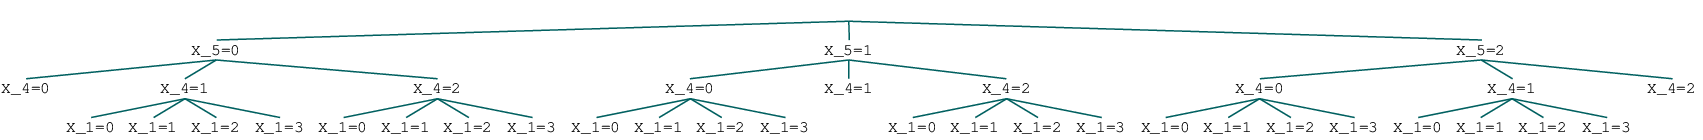

In [9]:
node = searchtree.infer('max_value')
node.tree.plot_tree()

In [10]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 27
Number of Splits: 10


In [11]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 1.000
Test Accuracy : 1.000


# Monk 2

In [2]:
file = '../data/monk2-train.csv'
data = pd.DataFrame(pd.read_csv(file, sep=";")).values
#np.random.shuffle(data)
labels = set(data[:, -1])
K = len(labels)
print(data.shape)

kf = KFold(shuffle=True, random_state=256)
train_index, test_index = next(kf.split(data))

(169, 12)


In [3]:
data_train_fold = data[train_index]
data_test_fold = data[test_index]
stream_generator_train = StreamGeneratorReal(data_train_fold)
stream_generator_test = StreamGeneratorReal(data_test_fold)

In [4]:
n_iter = 10000
n_samples = 100
thresh_tree = -1e-6
thresh_leaf = 1e-6
thresh_mu = 0.8
thresh_sigma = 0.1
print_iter = 100
time_limit = 600
lambd = 0.01
gamma = 0.75

In [5]:
start_time = time()
tsdt = TSDT(stream_generator_train.categories, K, 'gini')
node, searchtree = tsdt.run(stream_generator_train, n_iter, n_samples, thresh_tree, thresh_leaf, thresh_mu, thresh_sigma, 'n_visits', lambd, gamma, print_iter, time_limit)
print('execution time : %.4f' %(time() - start_time))

iteration : 0
iteration : 100
iteration : 200
iteration : 300
iteration : 400
iteration : 500
iteration : 600
iteration : 700
iteration : 800
iteration : 900
iteration : 1000
iteration : 1100
iteration : 1200
iteration : 1300
iteration : 1400
iteration : 1500
iteration : 1600
iteration : 1700
iteration : 1800
iteration : 1900
iteration : 2000
iteration : 2100
iteration : 2200
iteration : 2300
iteration : 2400
iteration : 2500
iteration : 2600
iteration : 2700
iteration : 2800
iteration : 2900
iteration : 3000
iteration : 3100
iteration : 3200
iteration : 3300
iteration : 3400
iteration : 3500
iteration : 3600
iteration : 3700
iteration : 3800
iteration : 3900
iteration : 4000
iteration : 4100
iteration : 4200
iteration : 4300
iteration : 4400
iteration : 4500
iteration : 4600
iteration : 4700
iteration : 4800
iteration : 4900
iteration : 5000
iteration : 5100
iteration : 5200
iteration : 5300
iteration : 5400
iteration : 5500
iteration : 5600
iteration : 5700
iteration : 5800
iteration

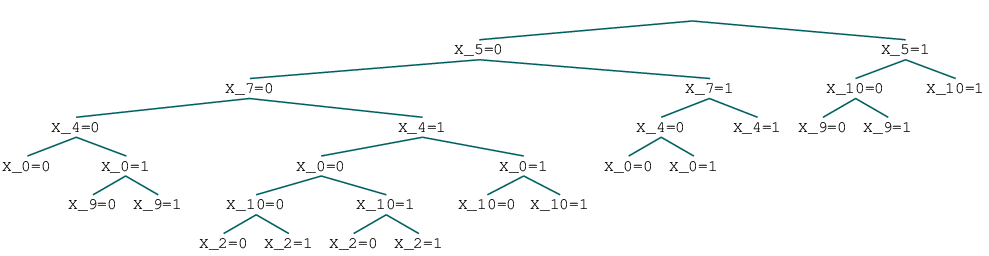

In [6]:
node.tree.plot_tree()

In [7]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 15
Number of Splits: 14


In [8]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.874
Test Accuracy : 0.735


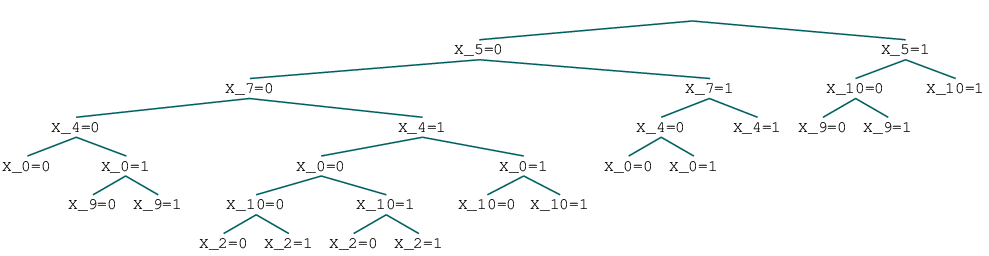

In [9]:
node = searchtree.infer('max_value')
node.tree.plot_tree()

In [10]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 15
Number of Splits: 14


In [11]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.874
Test Accuracy : 0.735


# Monk 3

In [2]:
file = '../data/monk3-train.csv'
data = pd.DataFrame(pd.read_csv(file, sep=";")).values
#np.random.shuffle(data)
labels = set(data[:, -1])
K = len(labels)
print(data.shape)

kf = KFold(shuffle=True, random_state=256)
train_index, test_index = next(kf.split(data))

(122, 12)


In [3]:
data_train_fold = data[train_index]
data_test_fold = data[test_index]
stream_generator_train = StreamGeneratorReal(data_train_fold)
stream_generator_test = StreamGeneratorReal(data_test_fold)

In [4]:
n_iter = 10000
n_samples = 100
thresh_tree = -1e-6
thresh_leaf = 1e-6
thresh_mu = 0.8
thresh_sigma = 0.1
print_iter = 100
time_limit = 600
lambd = 0.01
gamma = 0.75

In [5]:
start_time = time()
tsdt = TSDT(stream_generator_train.categories, K, 'gini')
node, searchtree = tsdt.run(stream_generator_train, n_iter, n_samples, thresh_tree, thresh_leaf, thresh_mu, thresh_sigma, 'n_visits', lambd, gamma, print_iter, time_limit)
print('execution time : %.4f' %(time() - start_time))

iteration : 0
iteration : 100
iteration : 200
iteration : 300
iteration : 400
iteration : 500
iteration : 600
iteration : 700
iteration : 800
iteration : 900
iteration : 1000
iteration : 1100
iteration : 1200
iteration : 1300
iteration : 1400
iteration : 1500
iteration : 1600
iteration : 1700
iteration : 1800
iteration : 1900
iteration : 2000
iteration : 2100
iteration : 2200
iteration : 2300
iteration : 2400
iteration : 2500
iteration : 2600
iteration : 2700
iteration : 2800
iteration : 2900
iteration : 3000
iteration : 3100
iteration : 3200
iteration : 3300
iteration : 3400
iteration : 3500
iteration : 3600
iteration : 3700
iteration : 3800
iteration : 3900
iteration : 4000
iteration : 4100
iteration : 4200
iteration : 4300
iteration : 4400
iteration : 4500
iteration : 4600
iteration : 4700
iteration : 4800
iteration : 4900
iteration : 5000
iteration : 5100
iteration : 5200
iteration : 5300
iteration : 5400
iteration : 5500
iteration : 5600
iteration : 5700
iteration : 5800
iteration

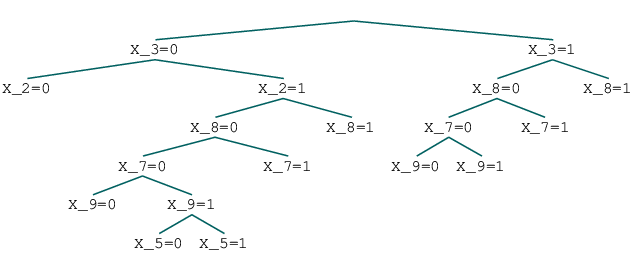

In [6]:
node.tree.plot_tree()

In [7]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 10
Number of Splits: 9


In [8]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.948
Test Accuracy : 0.880


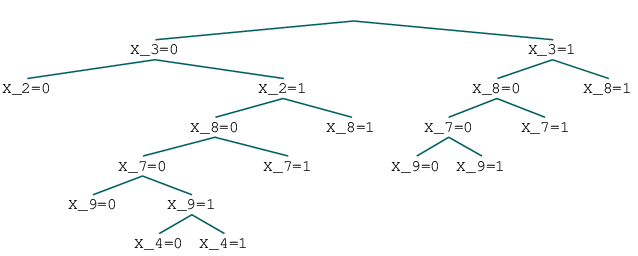

In [9]:
node = searchtree.infer('max_value')
node.tree.plot_tree()

In [10]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 10
Number of Splits: 9


In [11]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.948
Test Accuracy : 0.840


# Tic-Tac-Toe

In [2]:
file = '../data/tic-tac-toe.csv'
data = pd.DataFrame(pd.read_csv(file, sep=";")).values
np.random.shuffle(data)
labels = set(data[:, -1])
K = len(labels)
print(data.shape)

kf = KFold(shuffle=True, random_state=256)
train_index, test_index = next(kf.split(data))

(958, 19)


In [3]:
data_train_fold = data[train_index]
data_test_fold = data[test_index]
stream_generator_train = StreamGeneratorReal(data_train_fold)
stream_generator_test = StreamGeneratorReal(data_test_fold)

In [4]:
n_iter = 10000
n_samples = 100
thresh_tree = -1e-6
thresh_leaf = 1e-6
thresh_mu = 0.8
thresh_sigma = 0.1
print_iter = 100
time_limit = 600
lambd = 0.0001
gamma = 0.75

In [5]:
start_time = time()
tsdt = TSDT(stream_generator_train.categories, K, 'gini')
node, searchtree = tsdt.run(stream_generator_train, n_iter, n_samples, thresh_tree, thresh_leaf, thresh_mu, thresh_sigma, 'n_visits', lambd, gamma, print_iter, time_limit)
print('execution time : %.4f' %(time() - start_time))

iteration : 0
iteration : 100
iteration : 200
iteration : 300
iteration : 400
iteration : 500
iteration : 600
iteration : 700
iteration : 800
iteration : 900
iteration : 1000
iteration : 1100
iteration : 1200
iteration : 1300
iteration : 1400
iteration : 1500
iteration : 1600
iteration : 1700
iteration : 1800
iteration : 1900
iteration : 2000
iteration : 2100
iteration : 2200
iteration : 2300
iteration : 2400
iteration : 2500
iteration : 2600
iteration : 2700
iteration : 2800
iteration : 2900
iteration : 3000
iteration : 3100
iteration : 3200
iteration : 3300
iteration : 3400
iteration : 3500
iteration : 3600
iteration : 3700
iteration : 3800
iteration : 3900
iteration : 4000
iteration : 4100
iteration : 4200
iteration : 4300
iteration : 4400
iteration : 4500
iteration : 4600
iteration : 4700
iteration : 4800
iteration : 4900
iteration : 5000
iteration : 5100
iteration : 5200
iteration : 5300
iteration : 5400
iteration : 5500
iteration : 5600
iteration : 5700
iteration : 5800
iteration

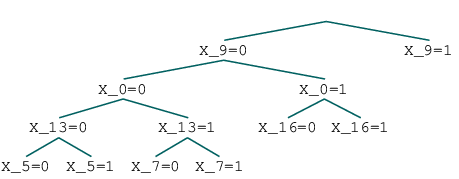

In [6]:
node.tree.plot_tree()

In [7]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 7
Number of Splits: 6


In [8]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.786
Test Accuracy : 0.766


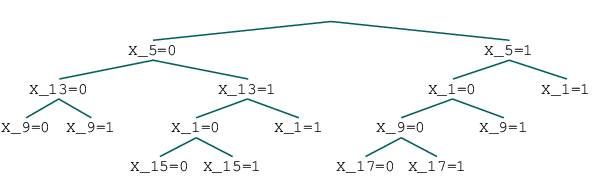

In [9]:
node = searchtree.infer('max_value')
node.tree.plot_tree()

In [10]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 9
Number of Splits: 8


In [11]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.830
Test Accuracy : 0.797


# Car Evaluation

In [4]:
file = '../data/car-evaluation.csv'
data = pd.DataFrame(pd.read_csv(file, sep=";")).values
np.random.shuffle(data)
labels = set(data[:, -1])
K = len(labels)
print(data.shape)

kf = KFold(shuffle=True, random_state=256)
train_index, test_index = next(kf.split(data))

(1728, 16)


In [5]:
data_train_fold = data[train_index]
data_test_fold = data[test_index]
stream_generator_train = StreamGeneratorReal(data_train_fold)
stream_generator_test = StreamGeneratorReal(data_test_fold)

In [6]:
n_iter = 10000
n_samples = 100
thresh_tree = -1e-6
thresh_leaf = 1e-6
thresh_mu = 0.8
thresh_sigma = 0.1
print_iter = 100
time_limit = 600
lambd = 0.0001
gamma = 0.75

In [7]:
start_time = time()
tsdt = TSDT(stream_generator_train.categories, K, 'gini')
node, searchtree = tsdt.run(stream_generator_train, n_iter, n_samples, thresh_tree, thresh_leaf, thresh_mu, thresh_sigma, 'n_visits', lambd, gamma, print_iter, time_limit)
print('execution time : %.4f' %(time() - start_time))

iteration : 0
iteration : 100
iteration : 200
iteration : 300
iteration : 400
iteration : 500
iteration : 600
iteration : 700
iteration : 800
iteration : 900
iteration : 1000
iteration : 1100
iteration : 1200
iteration : 1300
iteration : 1400
iteration : 1500
iteration : 1600
iteration : 1700
iteration : 1800
iteration : 1900
iteration : 2000
iteration : 2100
iteration : 2200
iteration : 2300
iteration : 2400
iteration : 2500
iteration : 2600
iteration : 2700
iteration : 2800
iteration : 2900
iteration : 3000
iteration : 3100
iteration : 3200
iteration : 3300
iteration : 3400
iteration : 3500
iteration : 3600
iteration : 3700
iteration : 3800
iteration : 3900
iteration : 4000
iteration : 4100
iteration : 4200
iteration : 4300
iteration : 4400
iteration : 4500
iteration : 4600
iteration : 4700
iteration : 4800
iteration : 4900
iteration : 5000
iteration : 5100
iteration : 5200
iteration : 5300
iteration : 5400
iteration : 5500
iteration : 5600
iteration : 5700
iteration : 5800
iteration

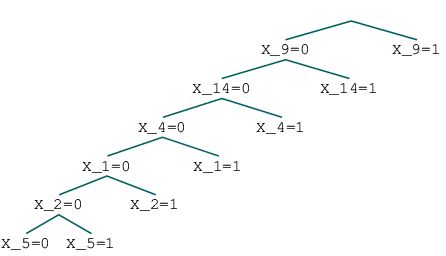

In [8]:
node.tree.plot_tree()

In [9]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 7
Number of Splits: 6


In [10]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.923
Test Accuracy : 0.931


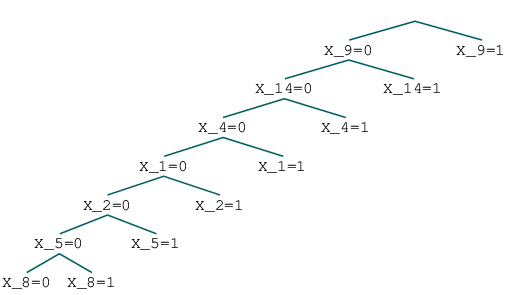

In [11]:
node = searchtree.infer('max_value')
node.tree.plot_tree()

In [12]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 8
Number of Splits: 7


In [13]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.910
Test Accuracy : 0.902


# COMPAS

In [2]:
file = '../data/compas-binary.csv'
data = pd.DataFrame(pd.read_csv(file, sep=";")).values
np.random.shuffle(data)
labels = set(data[:, -1])
K = len(labels)
print(data.shape)

kf = KFold(shuffle=True, random_state=256)
train_index, test_index = next(kf.split(data))

(6907, 13)


In [3]:
data_train_fold = data[train_index]
data_test_fold = data[test_index]
stream_generator_train = StreamGeneratorReal(data_train_fold)
stream_generator_test = StreamGeneratorReal(data_test_fold)

In [4]:
n_iter = 10000
n_samples = 100
thresh_tree = -1e-6
thresh_leaf = 1e-6
thresh_mu = 0.8
thresh_sigma = 0.1
print_iter = 100
time_limit = 600
lambd = 0.0001
gamma = 0.75

In [5]:
start_time = time()
tsdt = TSDT(stream_generator_train.categories, K, 'gini')
node, searchtree = tsdt.run(stream_generator_train, n_iter, n_samples, thresh_tree, thresh_leaf, thresh_mu, thresh_sigma, 'n_visits', lambd, gamma, print_iter, time_limit)
print('execution time : %.4f' %(time() - start_time))

iteration : 0
iteration : 100
iteration : 200
iteration : 300
iteration : 400
iteration : 500
iteration : 600
iteration : 700
iteration : 800
iteration : 900
iteration : 1000
iteration : 1100
iteration : 1200
iteration : 1300
iteration : 1400
iteration : 1500
iteration : 1600
iteration : 1700
iteration : 1800
iteration : 1900
iteration : 2000
iteration : 2100
iteration : 2200
iteration : 2300
iteration : 2400
iteration : 2500
iteration : 2600
iteration : 2700
iteration : 2800
iteration : 2900
iteration : 3000
iteration : 3100
iteration : 3200
iteration : 3300
iteration : 3400
iteration : 3500
iteration : 3600
iteration : 3700
iteration : 3800
iteration : 3900
iteration : 4000
iteration : 4100
iteration : 4200
iteration : 4300
iteration : 4400
iteration : 4500
iteration : 4600
iteration : 4700
iteration : 4800
iteration : 4900
iteration : 5000
iteration : 5100
iteration : 5200
iteration : 5300
iteration : 5400
iteration : 5500
iteration : 5600
iteration : 5700
iteration : 5800
iteration

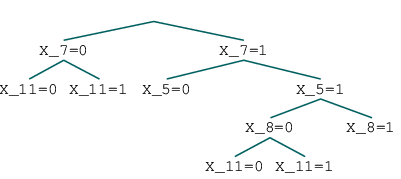

In [6]:
node.tree.plot_tree()

In [7]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 6
Number of Splits: 5


In [8]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.654
Test Accuracy : 0.659


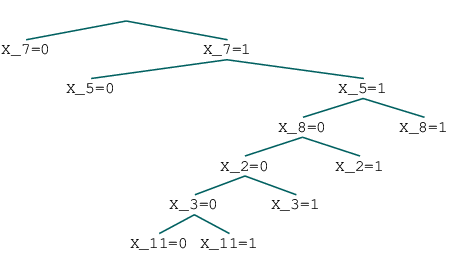

In [9]:
node = searchtree.infer('max_value')
node.tree.plot_tree()

In [10]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 7
Number of Splits: 6


In [11]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.662
Test Accuracy : 0.667


# FICO

In [2]:
file = '../data/fico_binary.csv'
data = pd.DataFrame(pd.read_csv(file, sep=";")).values
np.random.shuffle(data)
labels = set(data[:, -1])
K = len(labels)
print(data.shape)

kf = KFold(shuffle=True, random_state=256)
train_index, test_index = next(kf.split(data))

(10459, 18)


In [3]:
data_train_fold = data[train_index]
data_test_fold = data[test_index]
stream_generator_train = StreamGeneratorReal(data_train_fold)
stream_generator_test = StreamGeneratorReal(data_test_fold)

In [4]:
n_iter = 10000
n_samples = 100
thresh_tree = -1e-6
thresh_leaf = 1e-6
thresh_mu = 0.8
thresh_sigma = 0.1
print_iter = 100
time_limit = 600
lambd = 0.0001
gamma = 0.75

In [5]:
start_time = time()
tsdt = TSDT(stream_generator_train.categories, K, 'gini')
node, searchtree = tsdt.run(stream_generator_train, n_iter, n_samples, thresh_tree, thresh_leaf, thresh_mu, thresh_sigma, 'n_visits', lambd, gamma, print_iter, time_limit)
print('execution time : %.4f' %(time() - start_time))

iteration : 0
iteration : 100
iteration : 200
iteration : 300
iteration : 400
iteration : 500
iteration : 600
iteration : 700
iteration : 800
iteration : 900
iteration : 1000
iteration : 1100
iteration : 1200
iteration : 1300
iteration : 1400
iteration : 1500
iteration : 1600
iteration : 1700
iteration : 1800
iteration : 1900
iteration : 2000
iteration : 2100
iteration : 2200
iteration : 2300
iteration : 2400
iteration : 2500
iteration : 2600
iteration : 2700
iteration : 2800
iteration : 2900
iteration : 3000
iteration : 3100
iteration : 3200
iteration : 3300
iteration : 3400
iteration : 3500
iteration : 3600
iteration : 3700
iteration : 3800
iteration : 3900
iteration : 4000
iteration : 4100
iteration : 4200
iteration : 4300
iteration : 4400
iteration : 4500
iteration : 4600
iteration : 4700
iteration : 4800
iteration : 4900
iteration : 5000
iteration : 5100
iteration : 5200
iteration : 5300
iteration : 5400
iteration : 5500
iteration : 5600
iteration : 5700
iteration : 5800
iteration

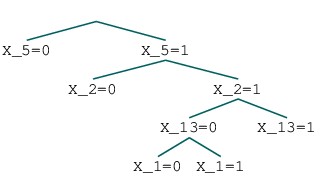

In [6]:
node.tree.plot_tree()

In [7]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 5
Number of Splits: 4


In [8]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.699
Test Accuracy : 0.705


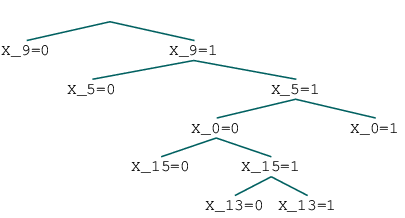

In [9]:
node = searchtree.infer('max_value')
node.tree.plot_tree()

In [10]:
print('Number of Leaves:', len(node.tree.leaves))
print('Number of Splits:', node.depth)

Number of Leaves: 6
Number of Splits: 5


In [11]:
print("Train Accuracy : %.3f" %node.test(stream_generator_train, n=stream_generator_train.data.shape[0]))
print("Test Accuracy : %.3f" %node.test(stream_generator_test, n=stream_generator_test.data.shape[0]))

Train Accuracy : 0.700
Test Accuracy : 0.713
